# 1D Hubbard Model

In [2]:
import numpy as np
from scipy.integrate import quad
from scipy.special import sici
import matplotlib.pyplot as plt  
import mpl_toolkits.axisartist as eixo
from sympy.physics.quantum.cg import CG
%matplotlib inline
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)
from scipy.linalg import eig
#from scipy.linalg import eigh
from numpy.linalg import eigh
import time
import math
from scipy.optimize import curve_fit

# Static case

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


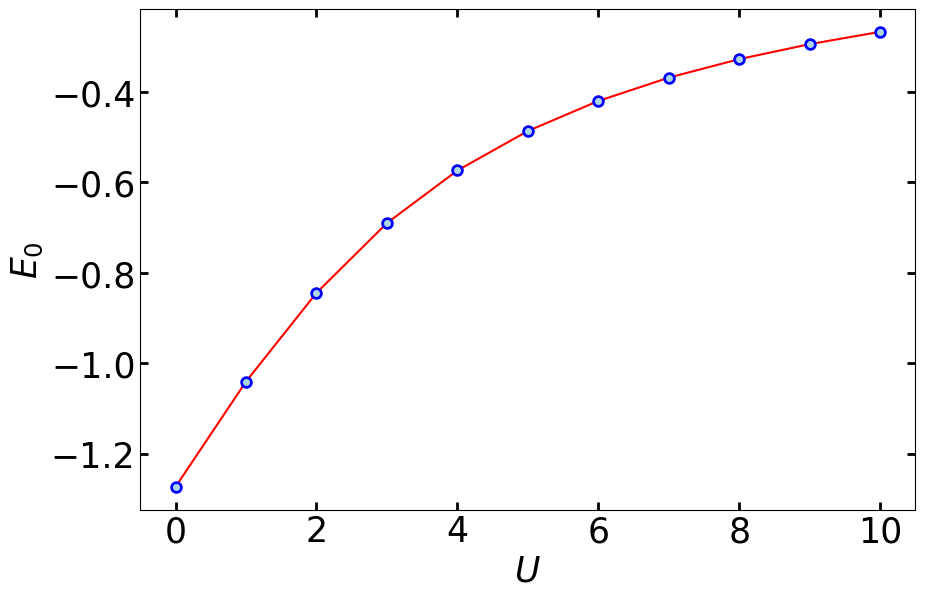

In [13]:
U=[0,1,2,3,4,5,6,7,8,9,10]
E0=[-1.2732395347219303,-1.0403686433614583,-0.8443743310492545,-0.6900383641371418,-0.5737293576617449,-0.4864800239133353,-0.42006851065256123,-0.36846954847533586,-0.3275305232402391,-0.29441297523652465,-0.2671549098462628]

linha=3
plt.figure(figsize=(10,6.5)) 
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize=25)
plt.plot(U,E0,'-', color='red',markersize=8)
plt.plot(U,E0,'o', color='blue',markersize=8)
plt.plot(U,E0,'o', color='lightblue',markersize=4)

plt.ylabel(r'$E_0$')
#plt.xlim(1,7)
#plt.ylim(-0.16,0.24)
plt.xlabel(r"$U$")
#plt.axhline(y = 0, color = 'r', linestyle = '--') 
plt.rcParams.update({'font.size': 25})
plt.legend(ncol=2,prop={'size':20}, loc='lower center',frameon=False)
plt.tick_params(direction='in', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(E0[0]-0.01,E0[-1]+0.01)
#plt.xlim(0-0.01,10+0.01)
#plt.savefig ('cerio.eps', dpi = 300, transparent = False, bbox_inches = 'tight')
#plt.savefig ('k5_m.png', dpi = 300, transparent = True, bbox_inches = 'tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


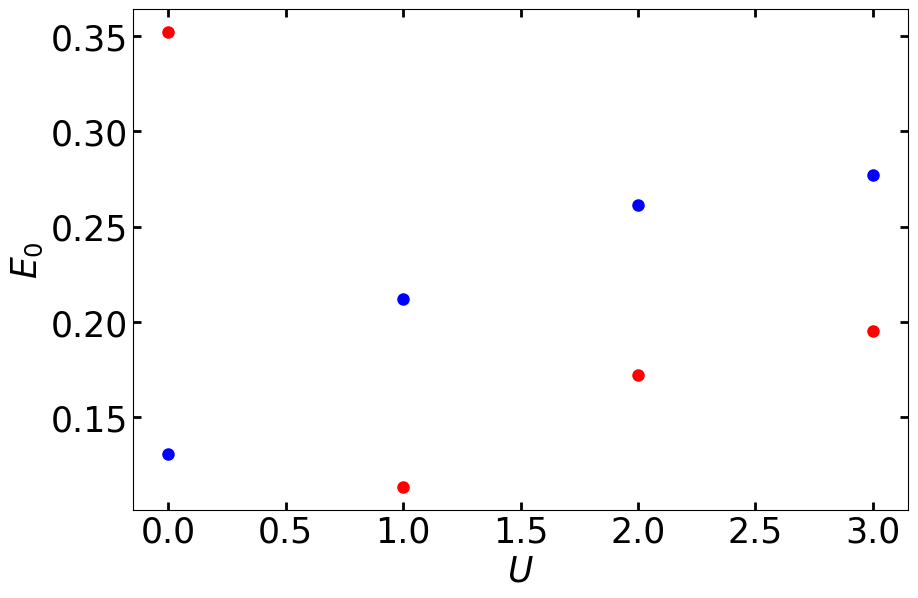

In [17]:
U=[0,1,2,3]
E005=[ -0.9717889081032333, -1.035839846519429,-0.8346790811371155, -0.6714600133887036]
E0d05=[-1.118033988749895,-0.8546376797184612,-0.661702138043239,-0.5256871208655183]

E007=[-0.790667689577054,-1.0298114508695813,-0.8266701230634145,-0.659247868465723]
E0d07=[-1.2206555615733703,-0.9249754075048373,-0.7052609461421178,-0.5516331340722995]

E005=np.array(E005)
E0d05=np.array(E0d05)
E007=np.array(E007)
E0d07=np.array(E0d07)

linha=3
plt.figure(figsize=(10,6.5)) 
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize=25)
plt.plot(U,-1*np.abs(E0d05-E005)/E0d05,'o', color='blue',markersize=8)
plt.plot(U,-1*np.abs(E0d07-E007)/E0d07,'o', color='red',markersize=8)

plt.ylabel(r'$E_0$')
#plt.xlim(1,7)
#plt.ylim(-0.16,0.24)
plt.xlabel(r"$U$")
#plt.axhline(y = 0, color = 'r', linestyle = '--') 
plt.rcParams.update({'font.size': 25})
plt.legend(ncol=2,prop={'size':20}, loc='lower center',frameon=False)
plt.tick_params(direction='in', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(E0[0]-0.01,E0[-1]+0.01)
#plt.xlim(0-0.01,10+0.01)
#plt.savefig ('cerio.eps', dpi = 300, transparent = False, bbox_inches = 'tight')
#plt.savefig ('k5_m.png', dpi = 300, transparent = True, bbox_inches = 'tight')
plt.show()

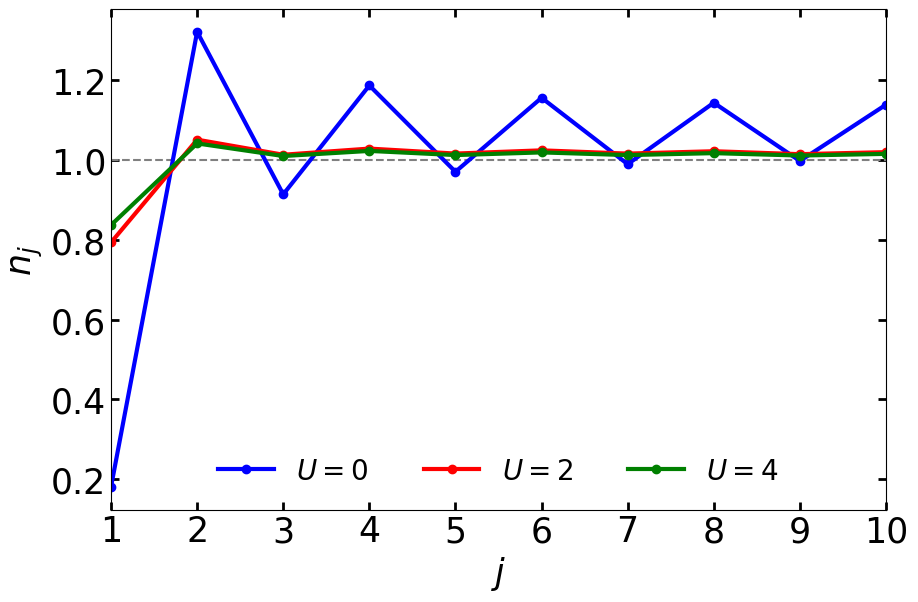

In [29]:
fa=open("V2Imp_DFT_MHU0.0L10N5.txt","r")
dados=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados.append(a)

fa.close()  

dados=np.array(dados)
dados=dados.astype(float)

fa=open("V2Imp_DFT_MHU2.0L10N5.txt","r")
dados2=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados2.append(a)

fa.close()  

dados2=np.array(dados2)
dados2=dados2.astype(float)


fa=open("V2Imp_DFT_MHU4.0L10N5.txt","r")
dados3=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados3.append(a)

fa.close()  

dados3=np.array(dados3)
dados3=dados3.astype(float)

U=0.0
J=2.0
delta=-0.5

linha=3
plt.figure(figsize=(10,6.5)) 
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize=25)
plt.axhline(y = 1, color = 'gray', linestyle = '--') 
plt.plot(dados[:,0],dados[:,1],'-o', color='blue',linewidth=linha, label=r'$U=0$')
plt.plot(dados2[:,0],dados2[:,1],'-o', color='red',linewidth=linha, label=r'$U=2$')
plt.plot(dados3[:,0],dados3[:,1],'-o', color='green',linewidth=linha, label=r'$U=4$')
plt.ylabel(r'$n_j$')
#plt.xlim(1,7)
#plt.ylim(-0.16,0.24)
plt.xlabel(r"$j$")
plt.rcParams.update({'font.size': 25})
plt.legend(ncol=3,prop={'size':20}, loc='lower center',frameon=False)
plt.tick_params(direction='in', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)
#plt.xscale('log')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
#plt.yscale('log')
#plt.ylim(0.05,1)
plt.xlim(1,10)
#plt.savefig ('cerio.eps', dpi = 300, transparent = False, bbox_inches = 'tight')
#plt.savefig ('k5_m.png', dpi = 300, transparent = True, bbox_inches = 'tight')
plt.show()

# Time-dependent Calculations

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


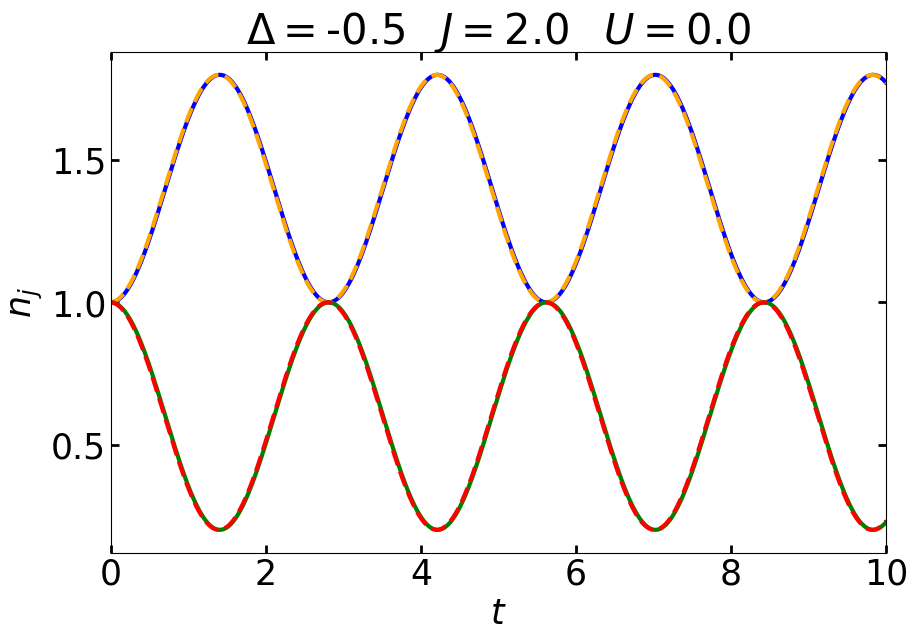

In [12]:
fa=open("ExatoU0.0Delta-0.5J1.0e-5.txt","r")
dados=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados.append(a)

fa.close()  

dados=np.array(dados)
dados=dados.astype(float)

fa=open("TDDFTDelta-0.5U0.0J1.0e-5t_i0.0t_f10N_time1000.txt","r")
dados2=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados2.append(a)

fa.close()  

dados2=np.array(dados2)
dados2=dados2.astype(float)

U=0.0
J=2.0
delta=-0.5

linha=3
plt.figure(figsize=(10,6.5)) 
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize=25)
plt.plot(dados[:,0],dados[:,1],'-', color='blue',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,3],'--', color='orange',linewidth=linha)
plt.plot(dados[:,0],dados[:,2],'-', color='green',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,5],'--', color='red',linewidth=linha)
plt.ylabel(r'$n_j$')
#plt.xlim(1,7)
#plt.ylim(-0.16,0.24)
plt.xlabel(r"$t$")
#plt.axhline(y = 0, color = 'r', linestyle = '--') 
plt.rcParams.update({'font.size': 25})
plt.legend(ncol=2,prop={'size':20}, loc='lower center',frameon=False)
plt.tick_params(direction='in', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)
plt.title(r'$\Delta=$'+str(delta)+r'$\;\;\;J=$'+str(round(J,3))+r'$\;\;\;U=$'+str(U), fontsize=30)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0.05,1)
plt.xlim(dados[0,0],dados[-1,0])
#plt.savefig ('cerio.eps', dpi = 300, transparent = False, bbox_inches = 'tight')
#plt.savefig ('k5_m.png', dpi = 300, transparent = True, bbox_inches = 'tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


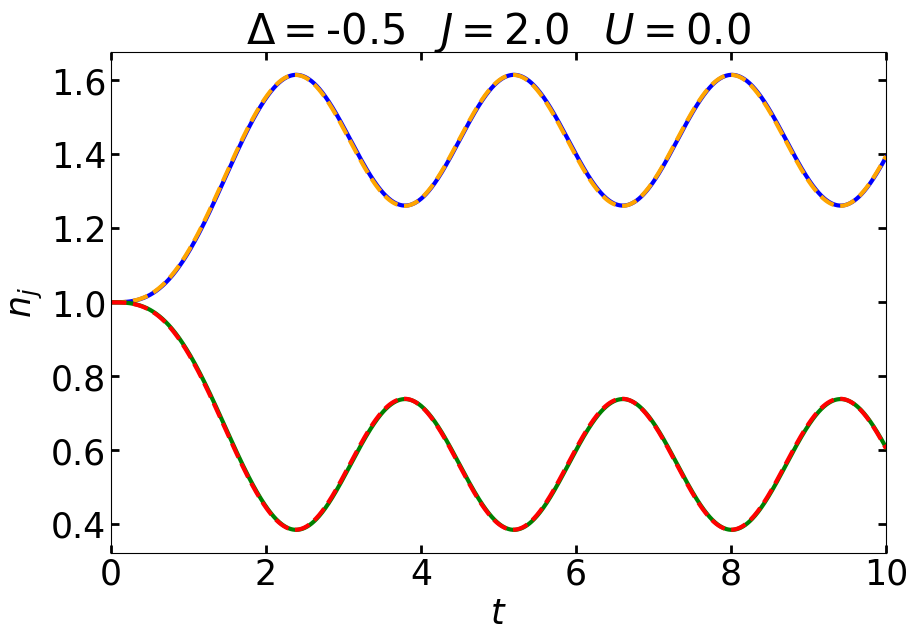

In [30]:
fa=open("ExatoU0.0Delta-0.5J2.0.txt","r")
dados=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados.append(a)

fa.close()  

dados=np.array(dados)
dados=dados.astype(float)

fa=open("TDDFTDelta-0.5U0.0J2.0t_i0.0t_f10N_time1000.txt","r")
dados2=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados2.append(a)

fa.close()  

dados2=np.array(dados2)
dados2=dados2.astype(float)

U=0.0
J=2.0
delta=-0.5

linha=3
plt.figure(figsize=(10,6.5)) 
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize=25)
plt.plot(dados[:,0],dados[:,1],'-', color='blue',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,3]*2,'--', color='orange',linewidth=linha)
plt.plot(dados[:,0],dados[:,2],'-', color='green',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,5]*2,'--', color='red',linewidth=linha)
plt.ylabel(r'$n_j$')
#plt.xlim(1,7)
#plt.ylim(-0.16,0.24)
plt.xlabel(r"$t$")
#plt.axhline(y = 0, color = 'r', linestyle = '--') 
plt.rcParams.update({'font.size': 25})
plt.legend(ncol=2,prop={'size':20}, loc='lower center',frameon=False)
plt.tick_params(direction='in', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)
plt.title(r'$\Delta=$'+str(delta)+r'$\;\;\;J=$'+str(round(J,3))+r'$\;\;\;U=$'+str(U), fontsize=30)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0.05,1)
plt.xlim(dados[0,0],dados[-1,0])
#plt.savefig ('cerio.eps', dpi = 300, transparent = False, bbox_inches = 'tight')
#plt.savefig ('k5_m.png', dpi = 300, transparent = True, bbox_inches = 'tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


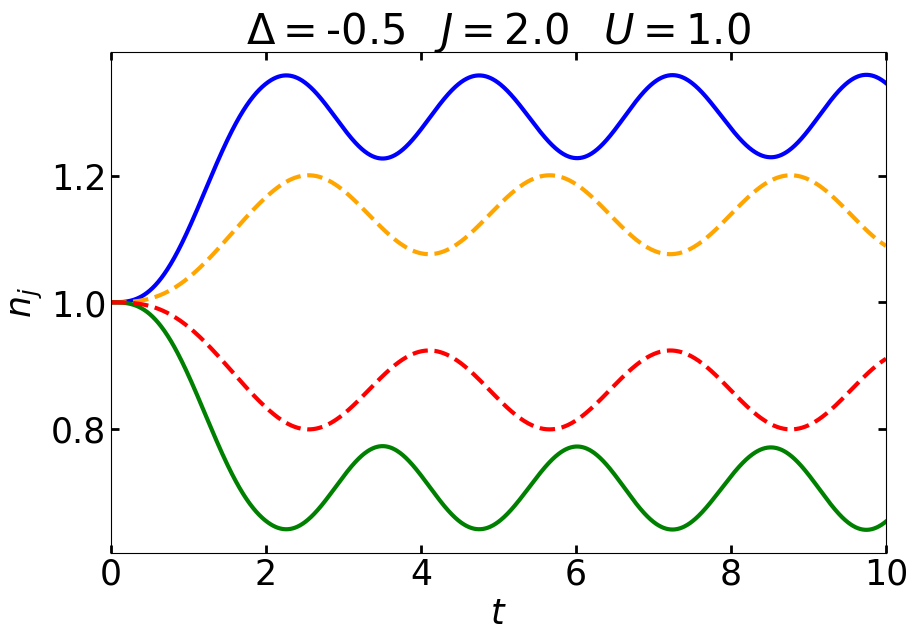

In [31]:
fa=open("ExatoU1.0Delta-0.5J2.0.txt","r")
dados=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados.append(a)

fa.close()  

dados=np.array(dados)
dados=dados.astype(float)

fa=open("TDDFTDelta-0.5U1.0J2.0t_i0.0t_f10N_time1000.txt","r")
dados2=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados2.append(a)

fa.close()  

dados2=np.array(dados2)
dados2=dados2.astype(float)

U=1.0
J=2.0
delta=-0.5

linha=3
plt.figure(figsize=(10,6.5)) 
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize=25)
plt.plot(dados[:,0],dados[:,1],'-', color='blue',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,3]*2,'--', color='orange',linewidth=linha)
plt.plot(dados[:,0],dados[:,2],'-', color='green',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,5]*2,'--', color='red',linewidth=linha)
plt.ylabel(r'$n_j$')
#plt.xlim(1,7)
#plt.ylim(-0.16,0.24)
plt.xlabel(r"$t$")
#plt.axhline(y = 0, color = 'r', linestyle = '--') 
plt.rcParams.update({'font.size': 25})
plt.legend(ncol=2,prop={'size':20}, loc='lower center',frameon=False)
plt.tick_params(direction='in', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)
plt.title(r'$\Delta=$'+str(delta)+r'$\;\;\;J=$'+str(round(J,3))+r'$\;\;\;U=$'+str(U), fontsize=30)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0.05,1)
plt.xlim(dados[0,0],dados[-1,0])
#plt.savefig ('cerio.eps', dpi = 300, transparent = False, bbox_inches = 'tight')
#plt.savefig ('k5_m.png', dpi = 300, transparent = True, bbox_inches = 'tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


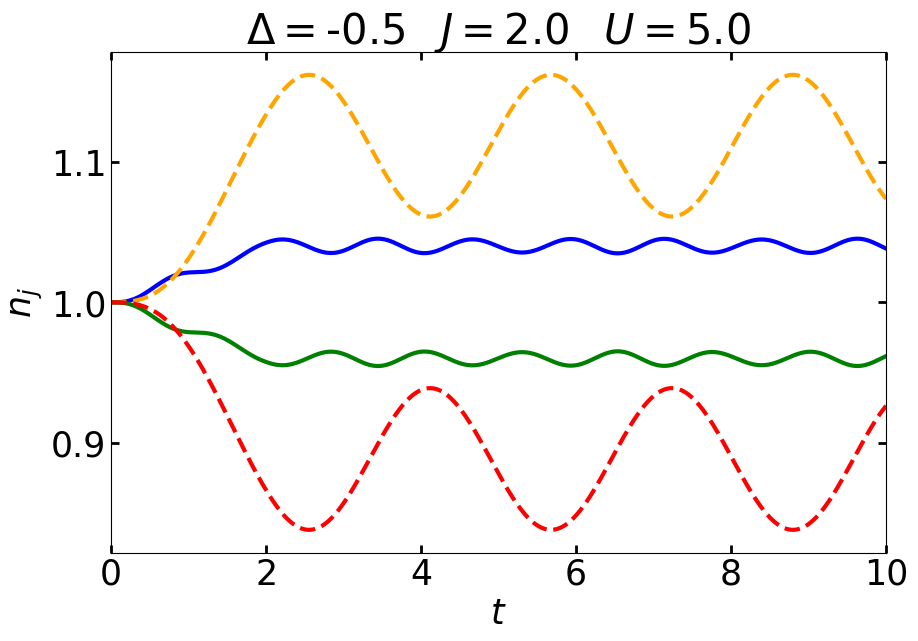

In [32]:
fa=open("ExatoU5.0Delta-0.5J2.0.txt","r")
dados=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados.append(a)

fa.close()  

dados=np.array(dados)
dados=dados.astype(float)

fa=open("TDDFTDelta-0.5U5.0J2.0t_i0.0t_f10N_time1000.txt","r")
dados2=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados2.append(a)

fa.close()  

dados2=np.array(dados2)
dados2=dados2.astype(float)

U=5.0
J=2.0
delta=-0.5

linha=3
plt.figure(figsize=(10,6.5)) 
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize=25)
plt.plot(dados[:,0],dados[:,1],'-', color='blue',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,3]*2,'--', color='orange',linewidth=linha)
plt.plot(dados[:,0],dados[:,2],'-', color='green',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,5]*2,'--', color='red',linewidth=linha)
plt.ylabel(r'$n_j$')
#plt.xlim(1,7)
#plt.ylim(-0.16,0.24)
plt.xlabel(r"$t$")
#plt.axhline(y = 0, color = 'r', linestyle = '--') 
plt.rcParams.update({'font.size': 25})
plt.legend(ncol=2,prop={'size':20}, loc='lower center',frameon=False)
plt.tick_params(direction='in', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)
plt.title(r'$\Delta=$'+str(delta)+r'$\;\;\;J=$'+str(round(J,3))+r'$\;\;\;U=$'+str(U), fontsize=30)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0.05,1)
plt.xlim(dados[0,0],dados[-1,0])
#plt.savefig ('cerio.eps', dpi = 300, transparent = False, bbox_inches = 'tight')
#plt.savefig ('k5_m.png', dpi = 300, transparent = True, bbox_inches = 'tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


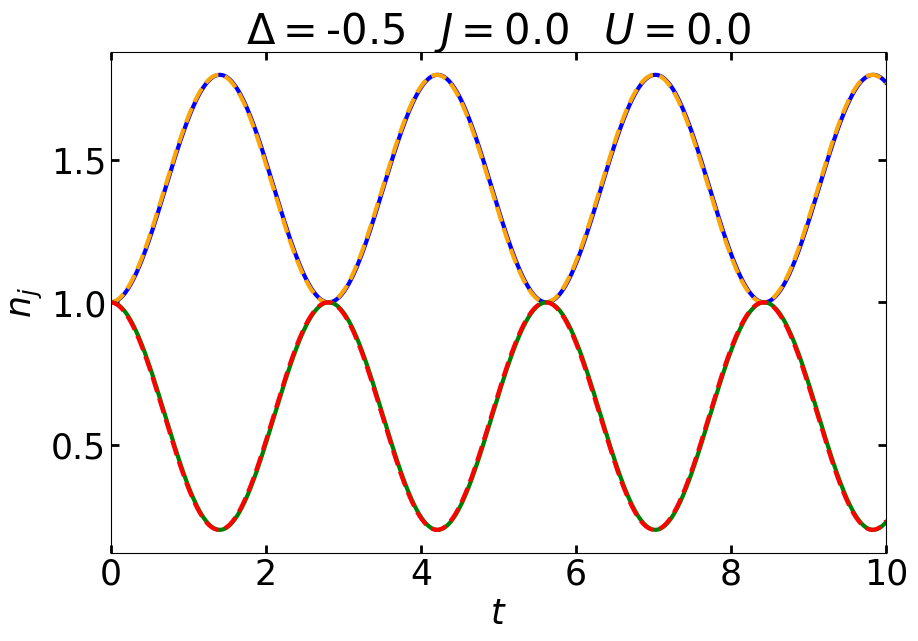

In [34]:
fa=open("ExatoU0.0Delta-0.5J1.0e-5.txt","r")
dados=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados.append(a)

fa.close()  

dados=np.array(dados)
dados=dados.astype(float)

fa=open("TDDFTDelta-0.5U0.0J1.0e-5t_i0.0t_f10N_time1000.txt","r")
dados2=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados2.append(a)

fa.close()  

dados2=np.array(dados2)
dados2=dados2.astype(float)

U=0.0
J=0.0
delta=-0.5

linha=3
plt.figure(figsize=(10,6.5)) 
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize=25)
plt.plot(dados[:,0],dados[:,1],'-', color='blue',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,3],'--', color='orange',linewidth=linha)
plt.plot(dados[:,0],dados[:,2],'-', color='green',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,5],'--', color='red',linewidth=linha)
plt.ylabel(r'$n_j$')
#plt.xlim(1,7)
#plt.ylim(-0.16,0.24)
plt.xlabel(r"$t$")
#plt.axhline(y = 0, color = 'r', linestyle = '--') 
plt.rcParams.update({'font.size': 25})
plt.legend(ncol=2,prop={'size':20}, loc='lower center',frameon=False)
plt.tick_params(direction='in', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)
plt.title(r'$\Delta=$'+str(delta)+r'$\;\;\;J=$'+str(round(J,3))+r'$\;\;\;U=$'+str(U), fontsize=30)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0.05,1)
plt.xlim(dados[0,0],dados[-1,0])
#plt.savefig ('cerio.eps', dpi = 300, transparent = False, bbox_inches = 'tight')
#plt.savefig ('k5_m.png', dpi = 300, transparent = True, bbox_inches = 'tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


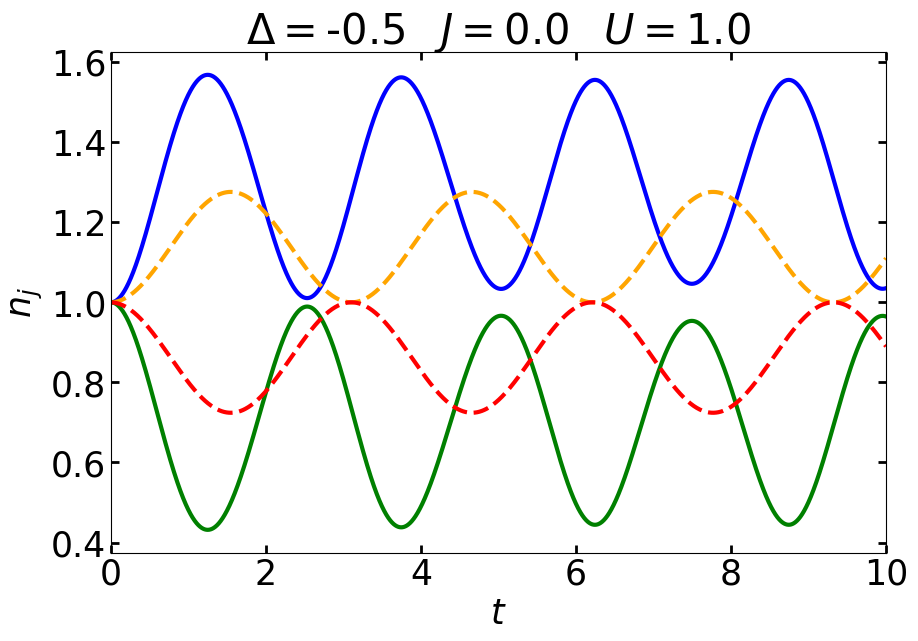

In [35]:
fa=open("ExatoU1.0Delta-0.5J1.0e-5.txt","r")
dados=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados.append(a)

fa.close()  

dados=np.array(dados)
dados=dados.astype(float)

fa=open("TDDFTDelta-0.5U1.0J1.0e-5t_i0.0t_f10N_time1000.txt","r")
dados2=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados2.append(a)

fa.close()  

dados2=np.array(dados2)
dados2=dados2.astype(float)

U=1.0
J=0.0
delta=-0.5

linha=3
plt.figure(figsize=(10,6.5)) 
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize=25)
plt.plot(dados[:,0],dados[:,1],'-', color='blue',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,3]*2,'--', color='orange',linewidth=linha)
plt.plot(dados[:,0],dados[:,2],'-', color='green',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,5]*2,'--', color='red',linewidth=linha)
plt.ylabel(r'$n_j$')
#plt.xlim(1,7)
#plt.ylim(-0.16,0.24)
plt.xlabel(r"$t$")
#plt.axhline(y = 0, color = 'r', linestyle = '--') 
plt.rcParams.update({'font.size': 25})
plt.legend(ncol=2,prop={'size':20}, loc='lower center',frameon=False)
plt.tick_params(direction='in', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)
plt.title(r'$\Delta=$'+str(delta)+r'$\;\;\;J=$'+str(round(J,3))+r'$\;\;\;U=$'+str(U), fontsize=30)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0.05,1)
plt.xlim(dados[0,0],dados[-1,0])
#plt.savefig ('cerio.eps', dpi = 300, transparent = False, bbox_inches = 'tight')
#plt.savefig ('k5_m.png', dpi = 300, transparent = True, bbox_inches = 'tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


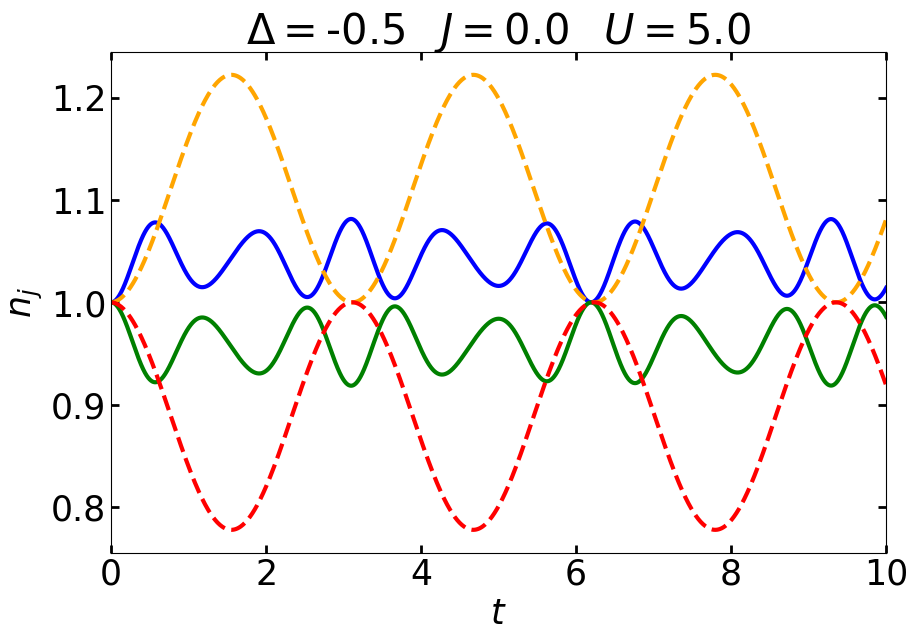

In [37]:
fa=open("ExatoU5.0Delta-0.5J1.0e-5.txt","r")
dados=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados.append(a)

fa.close()  

dados=np.array(dados)
dados=dados.astype(float)

fa=open("TDDFTDelta-0.5U5.0J1.0e-5t_i0.0t_f10N_time1000.txt","r")
dados2=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados2.append(a)

fa.close()  

dados2=np.array(dados2)
dados2=dados2.astype(float)

U=5.0
J=0.0
delta=-0.5

linha=3
plt.figure(figsize=(10,6.5)) 
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize=25)
plt.plot(dados[:,0],dados[:,1],'-', color='blue',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,3]*2,'--', color='orange',linewidth=linha)
plt.plot(dados[:,0],dados[:,2],'-', color='green',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,5]*2,'--', color='red',linewidth=linha)
plt.ylabel(r'$n_j$')
#plt.xlim(1,7)
#plt.ylim(-0.16,0.24)
plt.xlabel(r"$t$")
#plt.axhline(y = 0, color = 'r', linestyle = '--') 
plt.rcParams.update({'font.size': 25})
plt.legend(ncol=2,prop={'size':20}, loc='lower center',frameon=False)
plt.tick_params(direction='in', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)
plt.title(r'$\Delta=$'+str(delta)+r'$\;\;\;J=$'+str(round(J,3))+r'$\;\;\;U=$'+str(U), fontsize=30)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0.05,1)
plt.xlim(dados[0,0],dados[-1,0])
#plt.savefig ('cerio.eps', dpi = 300, transparent = False, bbox_inches = 'tight')
#plt.savefig ('k5_m.png', dpi = 300, transparent = True, bbox_inches = 'tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


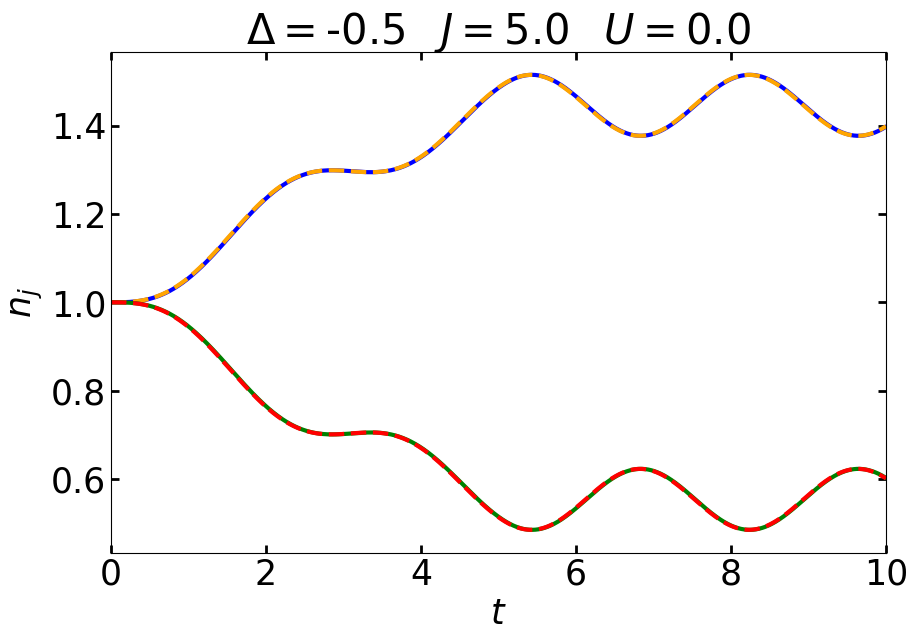

In [38]:
fa=open("ExatoU0.0Delta-0.5J5.0.txt","r")
dados=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados.append(a)

fa.close()  

dados=np.array(dados)
dados=dados.astype(float)

fa=open("TDDFTDelta-0.5U0.0J5.0t_i0.0t_f10N_time1000.txt","r")
dados2=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados2.append(a)

fa.close()  

dados2=np.array(dados2)
dados2=dados2.astype(float)

U=0.0
J=5.0
delta=-0.5

linha=3
plt.figure(figsize=(10,6.5)) 
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize=25)
plt.plot(dados[:,0],dados[:,1],'-', color='blue',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,3]*2,'--', color='orange',linewidth=linha)
plt.plot(dados[:,0],dados[:,2],'-', color='green',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,5]*2,'--', color='red',linewidth=linha)
plt.ylabel(r'$n_j$')
#plt.xlim(1,7)
#plt.ylim(-0.16,0.24)
plt.xlabel(r"$t$")
#plt.axhline(y = 0, color = 'r', linestyle = '--') 
plt.rcParams.update({'font.size': 25})
plt.legend(ncol=2,prop={'size':20}, loc='lower center',frameon=False)
plt.tick_params(direction='in', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)
plt.title(r'$\Delta=$'+str(delta)+r'$\;\;\;J=$'+str(round(J,3))+r'$\;\;\;U=$'+str(U), fontsize=30)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0.05,1)
plt.xlim(dados[0,0],dados[-1,0])
#plt.savefig ('cerio.eps', dpi = 300, transparent = False, bbox_inches = 'tight')
#plt.savefig ('k5_m.png', dpi = 300, transparent = True, bbox_inches = 'tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


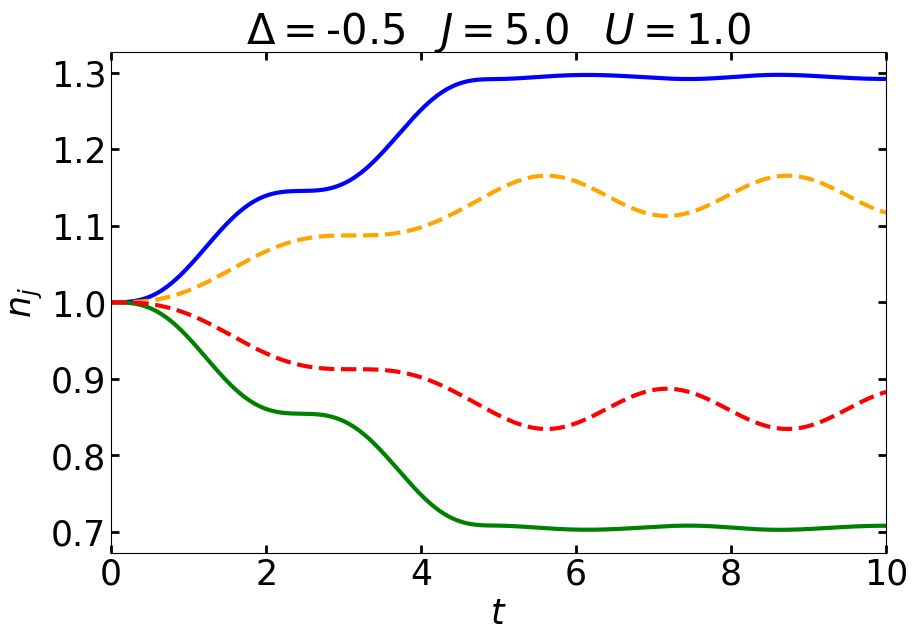

In [39]:
fa=open("ExatoU1.0Delta-0.5J5.0.txt","r")
dados=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados.append(a)

fa.close()  

dados=np.array(dados)
dados=dados.astype(float)

fa=open("TDDFTDelta-0.5U1.0J5.0t_i0.0t_f10N_time1000.txt","r")
dados2=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados2.append(a)

fa.close()  

dados2=np.array(dados2)
dados2=dados2.astype(float)

U=1.0
J=5.0
delta=-0.5

linha=3
plt.figure(figsize=(10,6.5)) 
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize=25)
plt.plot(dados[:,0],dados[:,1],'-', color='blue',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,3]*2,'--', color='orange',linewidth=linha)
plt.plot(dados[:,0],dados[:,2],'-', color='green',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,5]*2,'--', color='red',linewidth=linha)
plt.ylabel(r'$n_j$')
#plt.xlim(1,7)
#plt.ylim(-0.16,0.24)
plt.xlabel(r"$t$")
#plt.axhline(y = 0, color = 'r', linestyle = '--') 
plt.rcParams.update({'font.size': 25})
plt.legend(ncol=2,prop={'size':20}, loc='lower center',frameon=False)
plt.tick_params(direction='in', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)
plt.title(r'$\Delta=$'+str(delta)+r'$\;\;\;J=$'+str(round(J,3))+r'$\;\;\;U=$'+str(U), fontsize=30)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0.05,1)
plt.xlim(dados[0,0],dados[-1,0])
#plt.savefig ('cerio.eps', dpi = 300, transparent = False, bbox_inches = 'tight')
#plt.savefig ('k5_m.png', dpi = 300, transparent = True, bbox_inches = 'tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


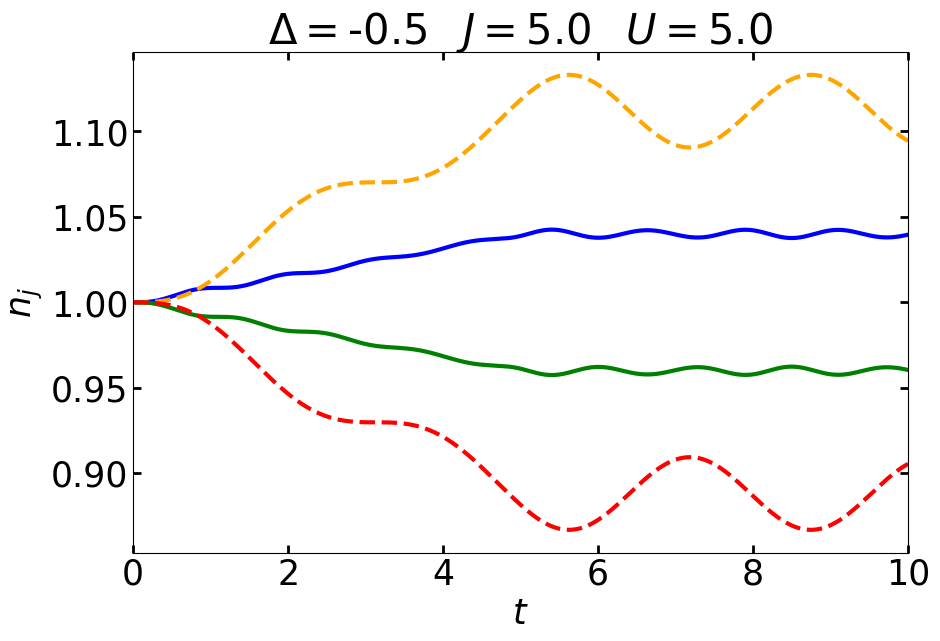

In [40]:
fa=open("ExatoU5.0Delta-0.5J5.0.txt","r")
dados=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados.append(a)

fa.close()  

dados=np.array(dados)
dados=dados.astype(float)

fa=open("TDDFTDelta-0.5U5.0J5.0t_i0.0t_f10N_time1000.txt","r")
dados2=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados2.append(a)

fa.close()  

dados2=np.array(dados2)
dados2=dados2.astype(float)

U=5.0
J=5.0
delta=-0.5

linha=3
plt.figure(figsize=(10,6.5)) 
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize=25)
plt.plot(dados[:,0],dados[:,1],'-', color='blue',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,3]*2,'--', color='orange',linewidth=linha)
plt.plot(dados[:,0],dados[:,2],'-', color='green',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,5]*2,'--', color='red',linewidth=linha)
plt.ylabel(r'$n_j$')
#plt.xlim(1,7)
#plt.ylim(-0.16,0.24)
plt.xlabel(r"$t$")
#plt.axhline(y = 0, color = 'r', linestyle = '--') 
plt.rcParams.update({'font.size': 25})
plt.legend(ncol=2,prop={'size':20}, loc='lower center',frameon=False)
plt.tick_params(direction='in', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)
plt.title(r'$\Delta=$'+str(delta)+r'$\;\;\;J=$'+str(round(J,3))+r'$\;\;\;U=$'+str(U), fontsize=30)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0.05,1)
plt.xlim(dados[0,0],dados[-1,0])
#plt.savefig ('cerio.eps', dpi = 300, transparent = False, bbox_inches = 'tight')
#plt.savefig ('k5_m.png', dpi = 300, transparent = True, bbox_inches = 'tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


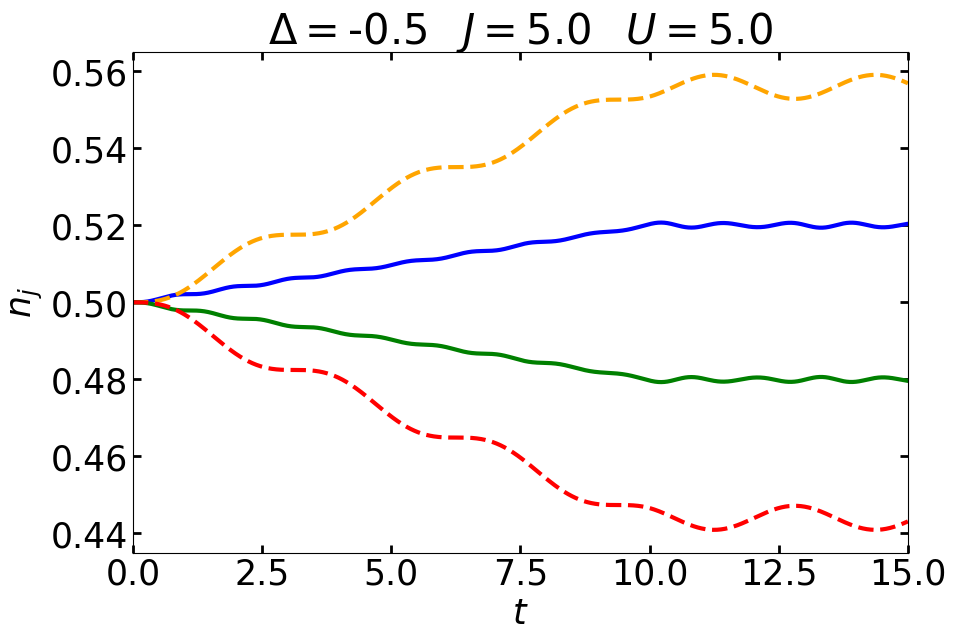

In [14]:
fa=open("ExatoU5.0Delta-0.5J10.0.txt","r")
dados=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados.append(a)

fa.close()  

dados=np.array(dados)
dados=dados.astype(float)

fa=open("TDDFTDelta-0.5U5.0J10.0t_i0.0t_f15N_time1000.txt","r")
dados2=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados2.append(a)

fa.close()  

dados2=np.array(dados2)
dados2=dados2.astype(float)

U=5.0
J=5.0
delta=-0.5

linha=3
plt.figure(figsize=(10,6.5)) 
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize=25)
plt.plot(dados[:,0],dados[:,1]/2,'-', color='blue',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,3],'--', color='orange',linewidth=linha)
plt.plot(dados[:,0],dados[:,2]/2,'-', color='green',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,5],'--', color='red',linewidth=linha)
plt.ylabel(r'$n_j$')
#plt.xlim(1,7)
#plt.ylim(-0.16,0.24)
plt.xlabel(r"$t$")
#plt.axhline(y = 0, color = 'r', linestyle = '--') 
plt.rcParams.update({'font.size': 25})
plt.legend(ncol=2,prop={'size':20}, loc='lower center',frameon=False)
plt.tick_params(direction='in', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)
plt.title(r'$\Delta=$'+str(delta)+r'$\;\;\;J=$'+str(round(J,3))+r'$\;\;\;U=$'+str(U), fontsize=30)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0.05,1)
plt.xlim(dados[0,0],dados[-1,0])
#plt.savefig ('cerio.eps', dpi = 300, transparent = False, bbox_inches = 'tight')
#plt.savefig ('k5_m.png', dpi = 300, transparent = True, bbox_inches = 'tight')
plt.show()

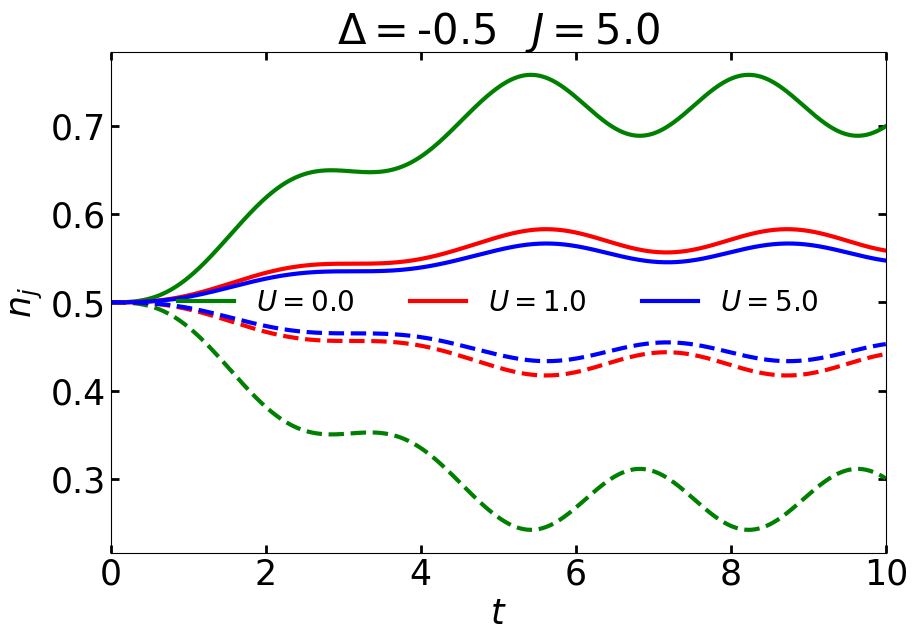

In [15]:
fa=open("TDDFTDelta-0.5U0.0J5.0t_i0.0t_f10N_time1000.txt","r")
dados=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados.append(a)

fa.close()  

dados=np.array(dados)
dados=dados.astype(float)

fa=open("TDDFTDelta-0.5U1.0J5.0t_i0.0t_f10N_time1000.txt","r")
dados1=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados1.append(a)

fa.close()  

dados1=np.array(dados1)
dados1=dados1.astype(float)


fa=open("TDDFTDelta-0.5U5.0J5.0t_i0.0t_f10N_time1000.txt","r")
dados2=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados2.append(a)

fa.close()  

dados2=np.array(dados2)
dados2=dados2.astype(float)

U=5.0
J=5.0
delta=-0.5

linha=3
plt.figure(figsize=(10,6.5)) 
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize=25)
plt.plot(dados[:,0],dados[:,3],'-', color='green',linewidth=linha,label=r'$U=0.0$')
plt.plot(dados1[:,0],dados1[:,3],'-', color='red',linewidth=linha,label=r'$U=1.0$')
plt.plot(dados2[:,0],dados2[:,3],'-', color='blue',linewidth=linha,label=r'$U=5.0$')
plt.plot(dados[:,0],dados[:,5],'--', color='green',linewidth=linha)
plt.plot(dados1[:,0],dados1[:,5],'--', color='red',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,5],'--', color='blue',linewidth=linha)
plt.ylabel(r'$n_j$')
#plt.xlim(1,7)
#plt.ylim(-0.16,0.24)
plt.xlabel(r"$t$")
#plt.axhline(y = 0, color = 'r', linestyle = '--') 
plt.rcParams.update({'font.size': 25})
plt.legend(ncol=3,prop={'size':20}, loc='center',frameon=False)
plt.tick_params(direction='in', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)
plt.title(r'$\Delta=$'+str(delta)+r'$\;\;\;J=$'+str(round(J,3)), fontsize=30)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0.05,1)
plt.xlim(dados[0,0],dados[-1,0])
#plt.savefig ('cerio.eps', dpi = 300, transparent = False, bbox_inches = 'tight')
#plt.savefig ('k5_m.png', dpi = 300, transparent = True, bbox_inches = 'tight')
plt.show()

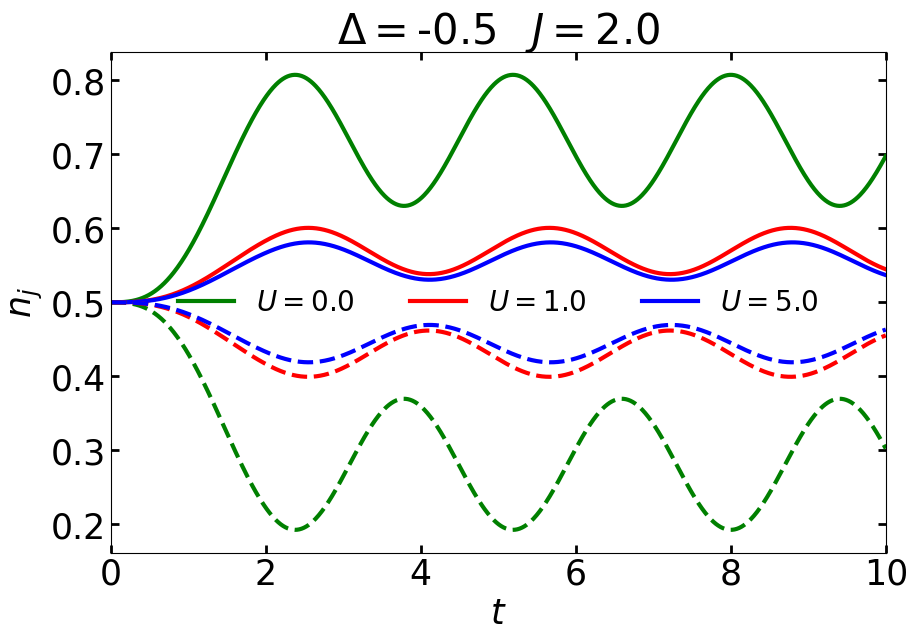

In [16]:
fa=open("TDDFTDelta-0.5U0.0J2.0t_i0.0t_f10N_time1000.txt","r")
dados=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados.append(a)

fa.close()  

dados=np.array(dados)
dados=dados.astype(float)

fa=open("TDDFTDelta-0.5U1.0J2.0t_i0.0t_f10N_time1000.txt","r")
dados1=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados1.append(a)

fa.close()  

dados1=np.array(dados1)
dados1=dados1.astype(float)


fa=open("TDDFTDelta-0.5U5.0J2.0t_i0.0t_f10N_time1000.txt","r")
dados2=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados2.append(a)

fa.close()  

dados2=np.array(dados2)
dados2=dados2.astype(float)

U=5.0
J=2.0
delta=-0.5

linha=3
plt.figure(figsize=(10,6.5)) 
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize=25)
plt.plot(dados[:,0],dados[:,3],'-', color='green',linewidth=linha,label=r'$U=0.0$')
plt.plot(dados1[:,0],dados1[:,3],'-', color='red',linewidth=linha,label=r'$U=1.0$')
plt.plot(dados2[:,0],dados2[:,3],'-', color='blue',linewidth=linha,label=r'$U=5.0$')
plt.plot(dados[:,0],dados[:,5],'--', color='green',linewidth=linha)
plt.plot(dados1[:,0],dados1[:,5],'--', color='red',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,5],'--', color='blue',linewidth=linha)
plt.ylabel(r'$n_j$')
#plt.xlim(1,7)
#plt.ylim(-0.16,0.24)
plt.xlabel(r"$t$")
#plt.axhline(y = 0, color = 'r', linestyle = '--') 
plt.rcParams.update({'font.size': 25})
plt.legend(ncol=3,prop={'size':20}, loc='center',frameon=False)
plt.tick_params(direction='in', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)
plt.title(r'$\Delta=$'+str(delta)+r'$\;\;\;J=$'+str(round(J,3)), fontsize=30)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0.05,1)
plt.xlim(dados[0,0],dados[-1,0])
#plt.savefig ('cerio.eps', dpi = 300, transparent = False, bbox_inches = 'tight')
#plt.savefig ('k5_m.png', dpi = 300, transparent = True, bbox_inches = 'tight')
plt.show()

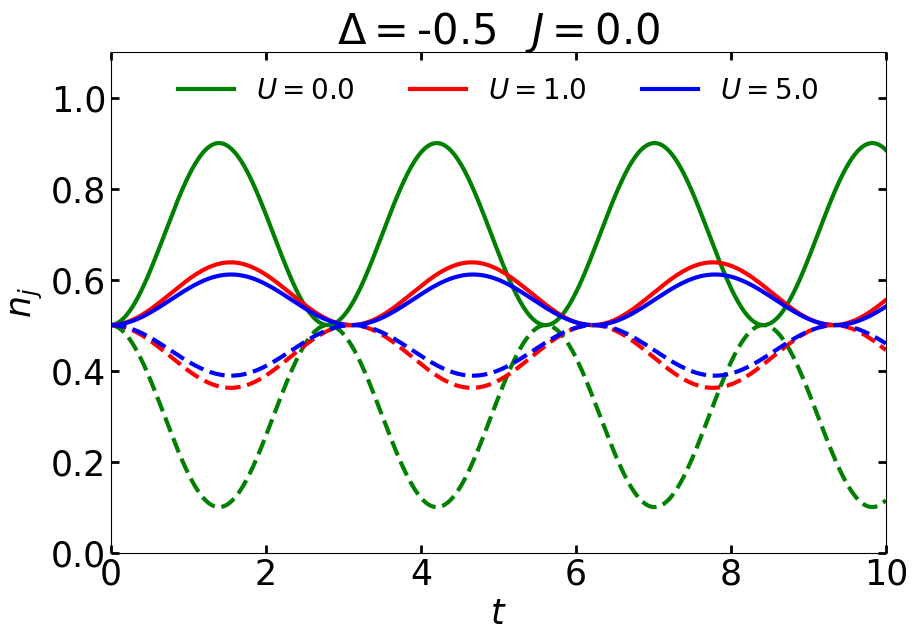

In [17]:
fa=open("TDDFTDelta-0.5U0.0J1.0e-5t_i0.0t_f10N_time1000.txt","r")
dados=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados.append(a)

fa.close()  

dados=np.array(dados)
dados=dados.astype(float)

fa=open("TDDFTDelta-0.5U1.0J1.0e-5t_i0.0t_f10N_time1000.txt","r")
dados1=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados1.append(a)

fa.close()  

dados1=np.array(dados1)
dados1=dados1.astype(float)


fa=open("TDDFTDelta-0.5U5.0J1.0e-5t_i0.0t_f10N_time1000.txt","r")
dados2=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados2.append(a)

fa.close()  

dados2=np.array(dados2)
dados2=dados2.astype(float)

U=5.0
J=0.0
delta=-0.5

linha=3
plt.figure(figsize=(10,6.5)) 
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize=25)
plt.plot(dados[:,0],dados[:,3],'-', color='green',linewidth=linha,label=r'$U=0.0$')
plt.plot(dados1[:,0],dados1[:,3],'-', color='red',linewidth=linha,label=r'$U=1.0$')
plt.plot(dados2[:,0],dados2[:,3],'-', color='blue',linewidth=linha,label=r'$U=5.0$')
plt.plot(dados[:,0],dados[:,5],'--', color='green',linewidth=linha)
plt.plot(dados1[:,0],dados1[:,5],'--', color='red',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,5],'--', color='blue',linewidth=linha)
plt.ylabel(r'$n_j$')
#plt.xlim(1,7)
#plt.ylim(-0.16,0.24)
plt.xlabel(r"$t$")
#plt.axhline(y = 0, color = 'r', linestyle = '--') 
plt.rcParams.update({'font.size': 25})
plt.legend(ncol=3,prop={'size':20}, loc='upper center',frameon=False)
plt.tick_params(direction='in', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)
plt.title(r'$\Delta=$'+str(delta)+r'$\;\;\;J=$'+str(round(J,3)), fontsize=30)
#plt.xscale('log')
#plt.yscale('log')
plt.ylim(0.0,1.1)
plt.xlim(dados[0,0],dados[-1,0])
#plt.savefig ('cerio.eps', dpi = 300, transparent = False, bbox_inches = 'tight')
#plt.savefig ('k5_m.png', dpi = 300, transparent = True, bbox_inches = 'tight')
plt.show()

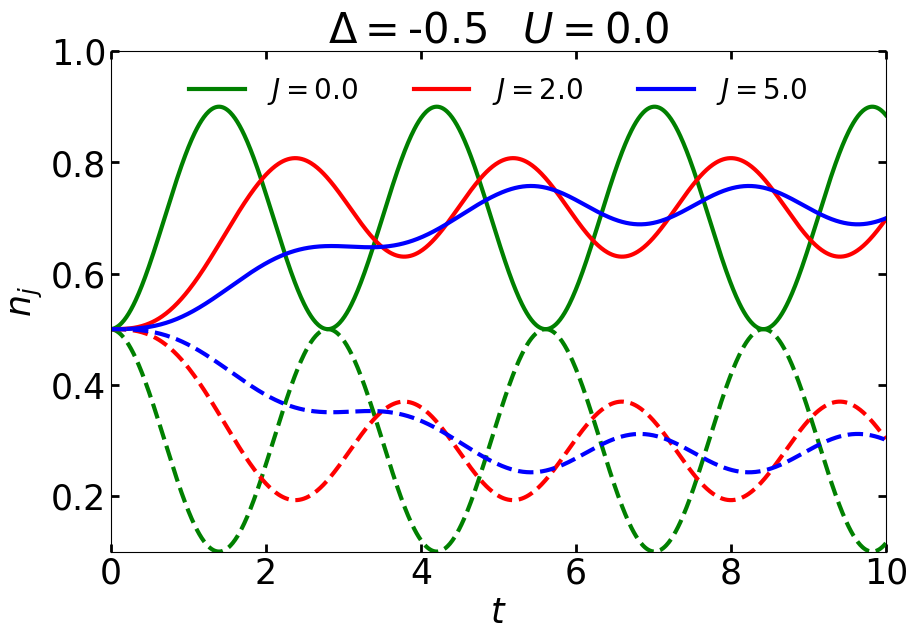

In [18]:
fa=open("TDDFTDelta-0.5U0.0J1.0e-5t_i0.0t_f10N_time1000.txt","r")
dados=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados.append(a)

fa.close()  

dados=np.array(dados)
dados=dados.astype(float)

fa=open("TDDFTDelta-0.5U0.0J2.0t_i0.0t_f10N_time1000.txt","r")
dados1=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados1.append(a)

fa.close()  

dados1=np.array(dados1)
dados1=dados1.astype(float)


fa=open("TDDFTDelta-0.5U0.0J5.0t_i0.0t_f10N_time1000.txt","r")
dados2=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados2.append(a)

fa.close()  

dados2=np.array(dados2)
dados2=dados2.astype(float)

U=0.0
J=2.0
delta=-0.5

linha=3
plt.figure(figsize=(10,6.5)) 
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize=25)
plt.plot(dados[:,0],dados[:,3],'-', color='green',linewidth=linha,label=r'$J=0.0$')
plt.plot(dados1[:,0],dados1[:,3],'-', color='red',linewidth=linha,label=r'$J=2.0$')
plt.plot(dados2[:,0],dados2[:,3],'-', color='blue',linewidth=linha,label=r'$J=5.0$')
plt.plot(dados[:,0],dados[:,5],'--', color='green',linewidth=linha)
plt.plot(dados1[:,0],dados1[:,5],'--', color='red',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,5],'--', color='blue',linewidth=linha)
plt.ylabel(r'$n_j$')
#plt.xlim(1,7)
#plt.ylim(-0.16,0.24)
plt.xlabel(r"$t$")
#plt.axhline(y = 0, color = 'r', linestyle = '--') 
plt.rcParams.update({'font.size': 25})
plt.legend(ncol=3,prop={'size':20}, loc='upper center',frameon=False)
plt.tick_params(direction='in', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)
plt.title(r'$\Delta=$'+str(delta)+r'$\;\;\;U=$'+str(round(U,3)), fontsize=30)
#plt.xscale('log')
#plt.yscale('log')
plt.ylim(0.1,1)
plt.xlim(dados[0,0],dados[-1,0])
#plt.savefig ('cerio.eps', dpi = 300, transparent = False, bbox_inches = 'tight')
#plt.savefig ('k5_m.png', dpi = 300, transparent = True, bbox_inches = 'tight')
plt.show()

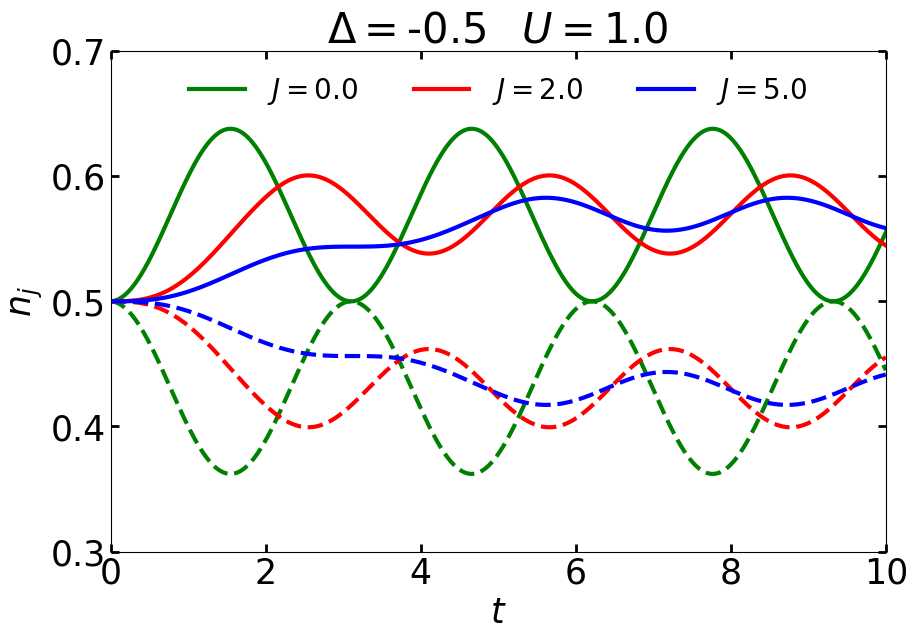

In [22]:
fa=open("TDDFTDelta-0.5U1.0J1.0e-5t_i0.0t_f10N_time1000.txt","r")
dados=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados.append(a)

fa.close()  

dados=np.array(dados)
dados=dados.astype(float)

fa=open("TDDFTDelta-0.5U1.0J2.0t_i0.0t_f10N_time1000.txt","r")
dados1=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados1.append(a)

fa.close()  

dados1=np.array(dados1)
dados1=dados1.astype(float)


fa=open("TDDFTDelta-0.5U1.0J5.0t_i0.0t_f10N_time1000.txt","r")
dados2=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados2.append(a)

fa.close()  

dados2=np.array(dados2)
dados2=dados2.astype(float)

U=1.0
J=2.0
delta=-0.5

linha=3
plt.figure(figsize=(10,6.5)) 
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize=25)
plt.plot(dados[:,0],dados[:,3],'-', color='green',linewidth=linha,label=r'$J=0.0$')
plt.plot(dados1[:,0],dados1[:,3],'-', color='red',linewidth=linha,label=r'$J=2.0$')
plt.plot(dados2[:,0],dados2[:,3],'-', color='blue',linewidth=linha,label=r'$J=5.0$')
plt.plot(dados[:,0],dados[:,5],'--', color='green',linewidth=linha)
plt.plot(dados1[:,0],dados1[:,5],'--', color='red',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,5],'--', color='blue',linewidth=linha)
plt.ylabel(r'$n_j$')
#plt.xlim(1,7)
#plt.ylim(-0.16,0.24)
plt.xlabel(r"$t$")
#plt.axhline(y = 0, color = 'r', linestyle = '--') 
plt.rcParams.update({'font.size': 25})
plt.legend(ncol=3,prop={'size':20}, loc='upper center',frameon=False)
plt.tick_params(direction='in', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)
plt.title(r'$\Delta=$'+str(delta)+r'$\;\;\;U=$'+str(round(U,3)), fontsize=30)
#plt.xscale('log')
#plt.yscale('log')
plt.ylim(0.3,0.7)
plt.xlim(dados[0,0],dados[-1,0])
#plt.savefig ('cerio.eps', dpi = 300, transparent = False, bbox_inches = 'tight')
#plt.savefig ('k5_m.png', dpi = 300, transparent = True, bbox_inches = 'tight')
plt.show()

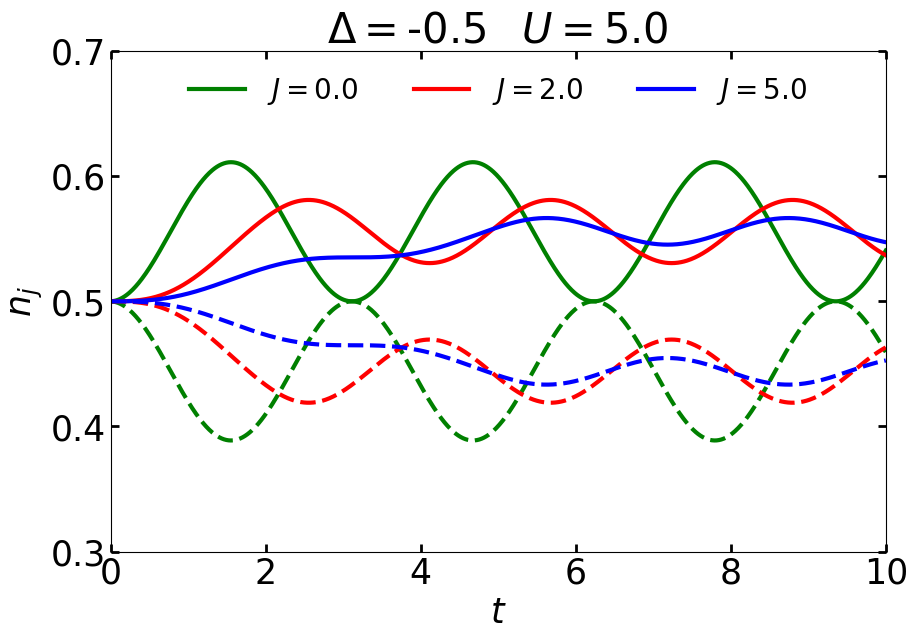

In [23]:
fa=open("TDDFTDelta-0.5U5.0J1.0e-5t_i0.0t_f10N_time1000.txt","r")
dados=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados.append(a)

fa.close()  

dados=np.array(dados)
dados=dados.astype(float)

fa=open("TDDFTDelta-0.5U5.0J2.0t_i0.0t_f10N_time1000.txt","r")
dados1=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados1.append(a)

fa.close()  

dados1=np.array(dados1)
dados1=dados1.astype(float)


fa=open("TDDFTDelta-0.5U5.0J5.0t_i0.0t_f10N_time1000.txt","r")
dados2=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="F_Energy":
        assim+=float(a[1])
    else:
        dados2.append(a)

fa.close()  

dados2=np.array(dados2)
dados2=dados2.astype(float)

U=5.0
J=2.0
delta=-0.5

linha=3
plt.figure(figsize=(10,6.5)) 
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize=25)
plt.plot(dados[:,0],dados[:,3],'-', color='green',linewidth=linha,label=r'$J=0.0$')
plt.plot(dados1[:,0],dados1[:,3],'-', color='red',linewidth=linha,label=r'$J=2.0$')
plt.plot(dados2[:,0],dados2[:,3],'-', color='blue',linewidth=linha,label=r'$J=5.0$')
plt.plot(dados[:,0],dados[:,5],'--', color='green',linewidth=linha)
plt.plot(dados1[:,0],dados1[:,5],'--', color='red',linewidth=linha)
plt.plot(dados2[:,0],dados2[:,5],'--', color='blue',linewidth=linha)
plt.ylabel(r'$n_j$')
#plt.xlim(1,7)
#plt.ylim(-0.16,0.24)
plt.xlabel(r"$t$")
#plt.axhline(y = 0, color = 'r', linestyle = '--') 
plt.rcParams.update({'font.size': 25})
plt.legend(ncol=3,prop={'size':20}, loc='upper center',frameon=False)
plt.tick_params(direction='in', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)
plt.title(r'$\Delta=$'+str(delta)+r'$\;\;\;U=$'+str(round(U,3)), fontsize=30)
#plt.xscale('log')
#plt.yscale('log')
plt.ylim(0.3,0.7)
plt.xlim(dados[0,0],dados[-1,0])
#plt.savefig ('cerio.eps', dpi = 300, transparent = False, bbox_inches = 'tight')
#plt.savefig ('k5_m.png', dpi = 300, transparent = True, bbox_inches = 'tight')
plt.show()

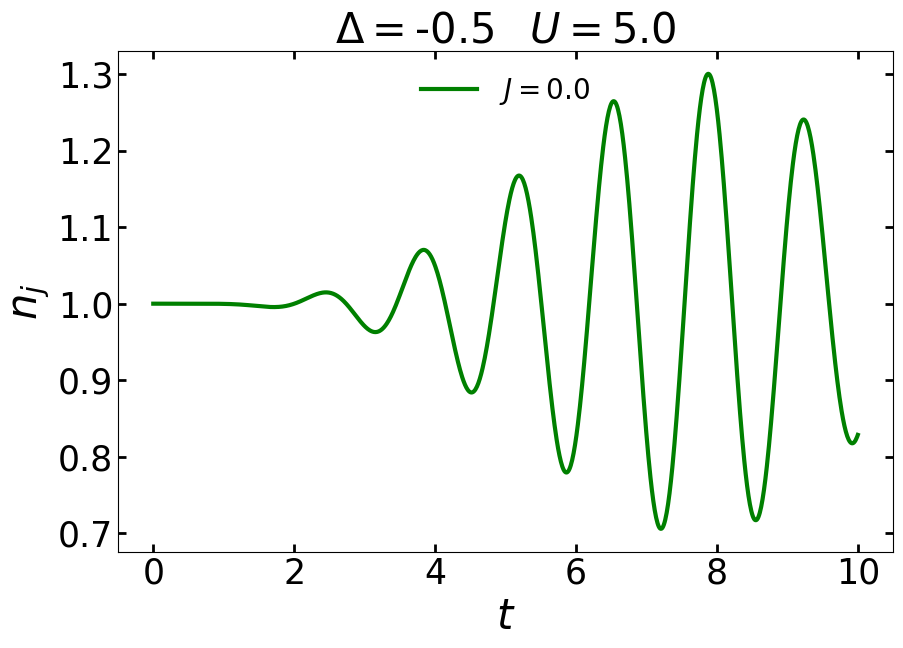

In [97]:

fa=open("TDDFTDelta-2.0U0.0J1.0e-5t_i0.0t_f10N_time1000.txt","r")
t=1
dados=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="Limit":
        assim+=float(a[1])
    else:
        dados.append(a)

fa.close()  

dados=np.array(dados)
dados = dados.astype(float)


linha=3
plt.figure(figsize=(10,6.5)) 
plt.tick_params(bottom=True, top=True, left=True, right=True, labelsize=25)
plt.plot(dados[:,0],dados[:,21],'-', color='green',linewidth=linha,label=r'$J=0.0$')
plt.ylabel(r'$n_j$')
#plt.xlim(1,7)
#plt.ylim(-0.16,0.24)
plt.xlabel(r"$t$")
#plt.axhline(y = 0, color = 'r', linestyle = '--') 
plt.rcParams.update({'font.size': 25})
plt.legend(ncol=3,prop={'size':20}, loc='upper center',frameon=False)
plt.tick_params(direction='in', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)
plt.title(r'$\Delta=$'+str(delta)+r'$\;\;\;U=$'+str(round(U,3)), fontsize=30)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0.3,0.7)
#plt.xlim(dados[0,0],dados[-1,0])
#plt.savefig ('cerio.eps', dpi = 300, transparent = False, bbox_inches = 'tight')
#plt.savefig ('k5_m.png', dpi = 300, transparent = True, bbox_inches = 'tight')
plt.show()

In [98]:
def values(N_sites,dados):

    ndados=np.zeros((len(dados[:,0]),N_sites))

    s=0

    for i in [3,5,7,9,11,13,15,17,19,21]:
        ndados[:,int((i-3)/2)]+=dados[:,i]
        s+=1
    return ndados

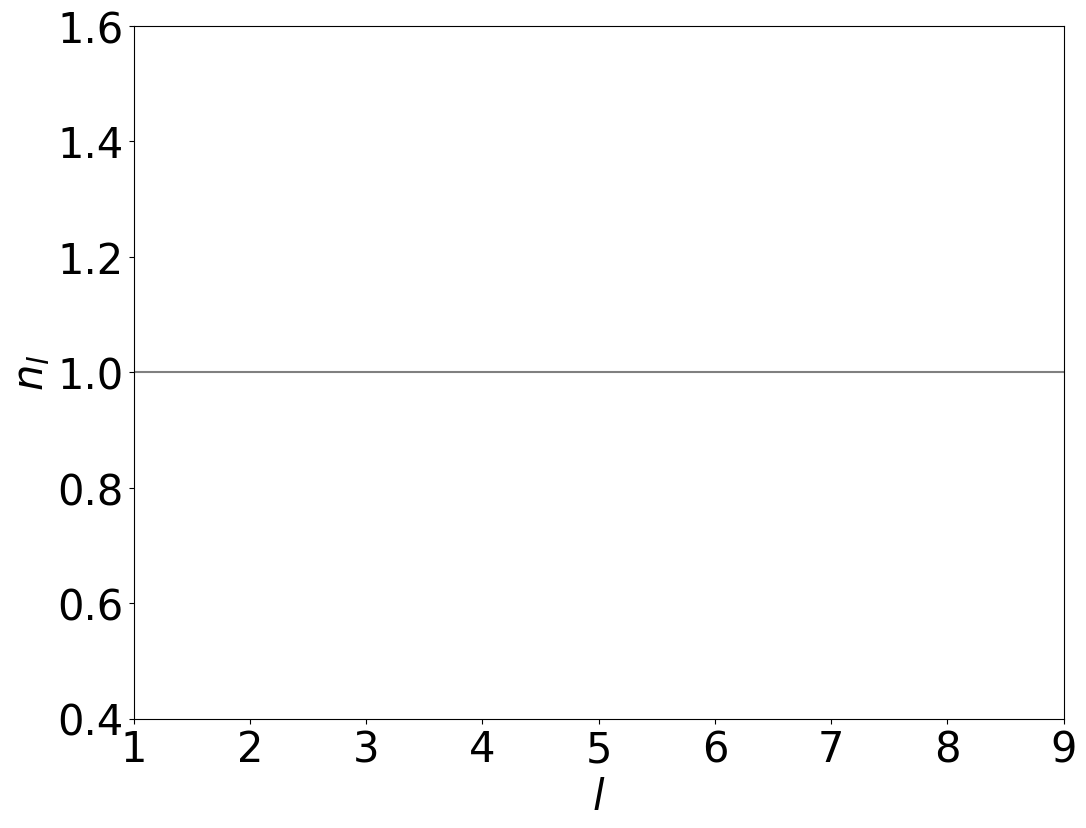

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter ffmpeg unavailable; using Pillow instead.


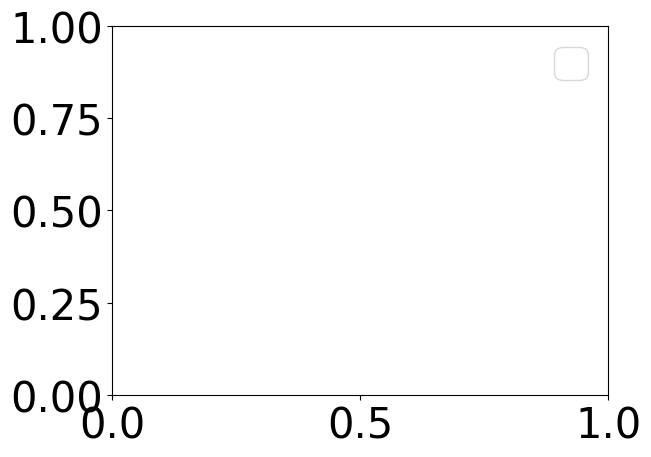

In [100]:
from matplotlib.animation import FuncAnimation

fa=open("TDDFTDelta-2.0U0.0J1.0e-5t_i0.0t_f10N_time1000.txt","r")
t=1
dados=[]
assim=0
for i in fa:
    a=i.split(" ")
    if a[0]=="Limit":
        assim+=float(a[1])
    else:
        dados.append(a)

fa.close()  

dados=np.array(dados)
dados = dados.astype(float)

ndados=values(10,dados)

l=[]
for i in range(1,10):
    l.append(i)

fig = plt.figure(figsize=(12,9))
ax = plt.axes(xlim=(1, 9), ylim=(0,2))
line, = ax.plot([], [], "o-",lw=2,color='blue')

def init():
    line.set_data([], [])
    return line,

def animate(i):
    posi=l
    p = ndados[i,posi]
    line.set_data(posi, p)

    return line,

anim = FuncAnimation(fig, animate, init_func=init,frames=998, interval=10, blit=True)
plt.axhline(y=1,color="gray",linewidth=1.5)
plt.xlabel(r'$l$')
plt.ylabel(r"$n_l$")
plt.xticks([1,2,3,4,5,6,7,8,9])
plt.ylim(0.4,1.6)
plt.rcParams.update({'font.size': 30})
plt.draw()
plt.show()
plt.legend()
anim.save('Friedel105_rule.gif')#, writer='imagemagick')